# Preliminary problems

* some basic problems that are worth knowing and, by the way, an introduction to PyTorch library
* single perceptron, two coupled perceptrons, simplest deep model and the Universal Approximation Theorem

## Logic gates and Perceptrons

#### XOR issue

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

c:\Programming\Anaconda\envs\ML_pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Let's start with training single perceptron model to simulate basic logic gates

In [2]:
# define basic logic gates
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float32)
gates = ("OR", "AND", "XOR")
# labels
Y_or = torch.tensor([0, 1, 1, 1], dtype=torch.float32).view(-1, 1)
Y_and = torch.tensor([0, 0, 0, 1], dtype=torch.float32).view(-1, 1)
Y_xor = torch.tensor([0, 1, 1, 0], dtype=torch.float32).view(-1, 1)

# let's define a model
class Perceptron(torch.nn.Module):
    # constructor
    def __init__(self, size):
        super(Perceptron, self).__init__()
        self.single_neuron = nn.Linear(size, 1)
        self.sigmoid = nn.Sigmoid()
    # mathod called once the model is executed
    def forward(self, x):
        x = self.single_neuron(x)
        return self.sigmoid(x)

# define model and learnig scheme
model = Perceptron(size=2)
optimizer = optim.SGD(model.parameters(), lr=0.5)
MSE = nn.MSELoss()

# train
N_epochs = 10000

for gate, y_gt in zip(gates, (Y_or, Y_and, Y_xor)):
    train_loss = []
    model.train()  # turn on the training mode
    for _ in range(N_epochs):
        # this will zero out the gradients for this batch
        optimizer.zero_grad()
        # make predictions
        y_pred = model(X)
        # calculate the MSE loss
        loss = MSE(y_pred, y_gt)
        # backpropagate the loss
        loss.backward()
        # update the model weights (with assumed learning rate)
        optimizer.step()
        train_loss.append(loss.item())
    print("last loss value = ", train_loss[-1])
    model.eval()
    for i, x in enumerate(X):
        print("{} {} {} -> {}".format(x[0].item(), gate, x[1].item(), model(x).item()))
    print()


last loss value =  0.0005055812071077526
0.0 OR 0.0 -> 0.033628109842538834
0.0 OR 1.0 -> 0.9788899421691895
1.0 OR 0.0 -> 0.978890061378479
1.0 OR 1.0 -> 0.9999837875366211

last loss value =  0.0007685293676331639
0.0 AND 0.0 -> 3.542310878401622e-05
0.0 AND 1.0 -> 0.030030198395252228
1.0 AND 0.0 -> 0.030030198395252228
1.0 AND 1.0 -> 0.964359700679779

last loss value =  0.25006070733070374
0.0 XOR 0.0 -> 0.009004777297377586
0.0 XOR 1.0 -> 0.9909672141075134
1.0 XOR 0.0 -> 0.9909672141075134
1.0 XOR 1.0 -> 0.9999992847442627



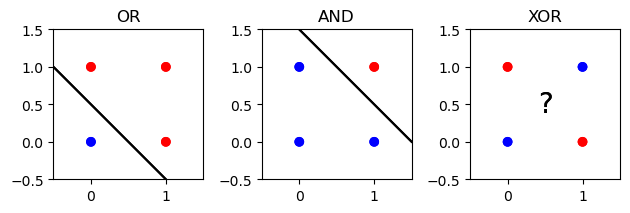

In [4]:
import matplotlib.pyplot as plt

for i, Y in enumerate([Y_or, Y_and, Y_xor]):
    ax = plt.subplot(131 + i)
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([-0.5, 1.5])
    ax.set_aspect('equal')

    plt.title(gates[i])
    plt.scatter(*zip(*X), c=Y, cmap='bwr')

    if i == 0:
        plt.plot([-0.5, 1], [1, -0.5], 'k')
    elif i == 1:
        plt.plot([0, 1.5], [1.5, 0], 'k')
    else:
        plt.text(0.5, 0.5, s="?", fontsize=20, ha='center', va='center')

plt.tight_layout()
plt.show()

- single perceptron is not able to capture XOR gate working

Now stack two perceptons and make the network deep

In [5]:
class PerceptronDeep(torch.nn.Module):
    # constructor
    def __init__(self, hidden_size):
        super(PerceptronDeep, self).__init__()
        self.hidden_layer = nn.Linear(2, hidden_size)
        self.output_layer = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    # mathod called once the model is executed
    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.sigmoid(x)
        x = self.output_layer(x)
        return self.sigmoid(x)

# train
N_epochs = 100000

for gate, y_gt in zip(gates, (Y_or, Y_and, Y_xor)):
    # define model and learnig scheme
    model = PerceptronDeep(hidden_size=2)
    optimizer = optim.SGD(model.parameters(), lr=0.5)
    # start training
    train_loss = []
    model.train()  # turn on the training mode
    for _ in range(N_epochs):
        # this will zero out the gradients for this batch
        optimizer.zero_grad()
        # make predictions
        y_pred = model(X)
        # calculate the MSE loss
        loss = MSE(y_pred, y_gt)
        # backpropagate the loss
        loss.backward()
        # update the model weights (with assumed learning rate)
        optimizer.step()
        train_loss.append(loss.item())
    print("last loss value = ", train_loss[-1])
    model.eval()
    for i, x in enumerate(X):
        print("{} {} {} -> {}".format(x[0].item(), gate, x[1].item(), model(x).item()))
    print()

last loss value =  2.137230330845341e-05
0.0 OR 0.0 -> 0.0072905197739601135
0.0 OR 1.0 -> 0.996067225933075
1.0 OR 0.0 -> 0.9960045218467712
1.0 OR 1.0 -> 0.9990479350090027

last loss value =  2.0931227481923997e-05
0.0 AND 0.0 -> 0.00014102125714998692
0.0 AND 1.0 -> 0.003986319527029991
1.0 AND 0.0 -> 0.003922173287719488
1.0 AND 1.0 -> 0.992759108543396

last loss value =  5.074294313089922e-05
0.0 XOR 0.0 -> 0.007073363289237022
0.0 XOR 1.0 -> 0.9918485879898071
1.0 XOR 0.0 -> 0.9932492971420288
1.0 XOR 1.0 -> 0.0063969409093260765



- ... while the deep model is able to capture XOR gate.

## Simple regression and Universal Approximation Theorem

Let's get back to (flat) perceptron.
- before we begin, let's generate some complex function:

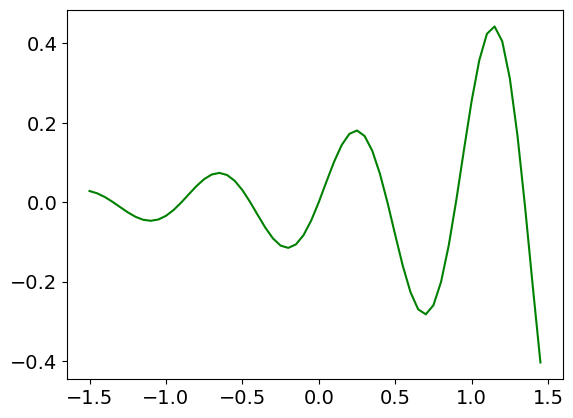

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

# define regression problem and generate synthetic data
X = torch.arange(-1.5, 1.5, 0.05).view(-1, 1).type(torch.float32)
y = torch.sin(X*7.)*torch.exp(X)/7.
plt.plot(X, y, 'g')
plt.show()

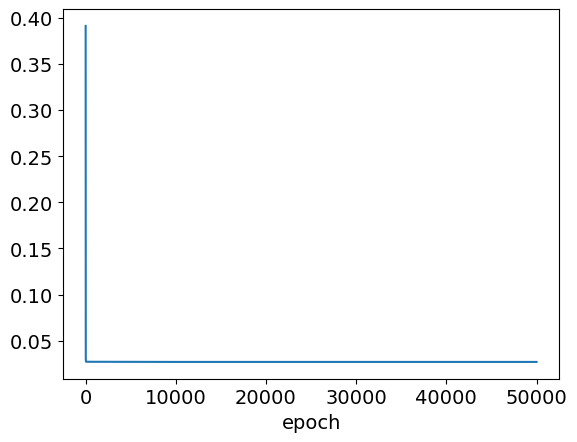

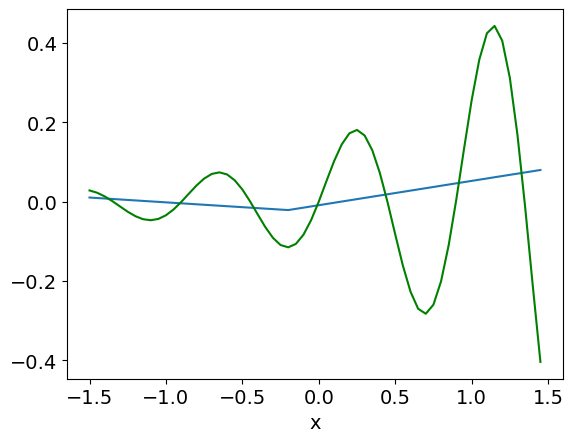

In [52]:
class PerceptronDeep(torch.nn.Module):
    # constructor
    def __init__(self, hidden_size):
        super(PerceptronDeep, self).__init__()
        self.hidden_layer = nn.Linear(1, hidden_size)
        self.mid_activation = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, 1)
        self.activation = nn.Tanh()  # Sigmoid has non-negative values
    # mathod called once the model is executed
    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.mid_activation(x)
        x = self.output_layer(x)
        return self.activation(x)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X, y = X.to(device), y.to(device)

# narrow model
model = PerceptronDeep(hidden_size=2).to(device)

optimizer = optim.SGD(model.parameters(), lr=0.2)
MSE = nn.MSELoss()

# train
N_epochs = 50000
train_loss = []
model.train()  # turn on the training mode
for _ in range(N_epochs):
    # this will zero out the gradients for this batch
    optimizer.zero_grad()
    # make predictions
    y_pred = model(X)
    # calculate the MSE loss
    loss = MSE(y_pred, y)
    # backpropagate the loss
    loss.backward()
    # update the model weights (with assumed learning rate)
    optimizer.step()
    train_loss.append(loss.item())

plt.plot(train_loss)
plt.xlabel('epoch')
plt.show()

model.eval()
plt.plot(X.cpu().numpy(), model(X).detach().cpu().numpy())
plt.plot(X.cpu().numpy(), y.cpu().numpy(), 'g')
plt.xlabel('x')
plt.show()

- poor fit, model has too small capacity.

Do the same but with much wider model:

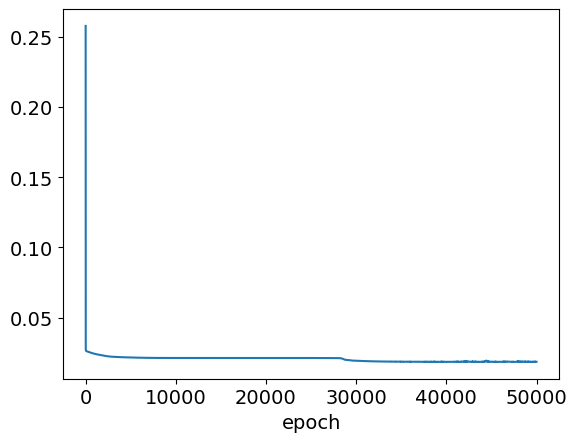

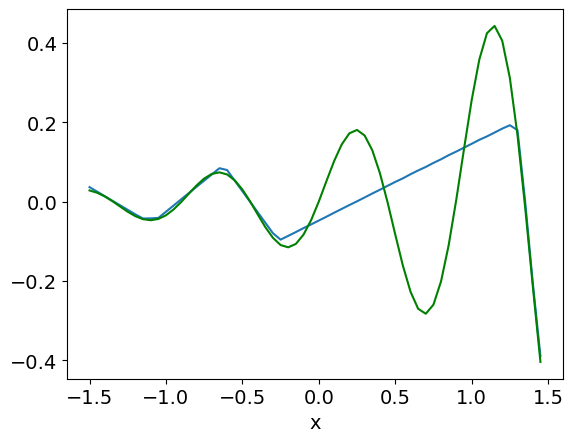

In [53]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# wider model
model = PerceptronDeep(hidden_size=10).to(device)
X, y = X.to(device), y.to(device)

# train
optimizer = optim.SGD(model.parameters(), lr=0.2)
N_epochs = 50000

train_loss = []
model.train()  # turn on the training mode
for _ in range(N_epochs):
    # this will zero out the gradients for this batch
    optimizer.zero_grad()
    # make predictions
    y_pred = model(X)
    # calculate the MSE loss
    loss = MSE(y_pred, y)
    # backpropagate the loss
    loss.backward()
    # update the model weights (with assumed learning rate)
    optimizer.step()
    train_loss.append(loss.item())

plt.plot(train_loss)
plt.xlabel('epoch')
plt.show()

model.eval()
plt.plot(X.cpu(), model(X).cpu().detach())
plt.plot(X.cpu(), y.cpu(), 'g')
plt.xlabel('x')
plt.show()

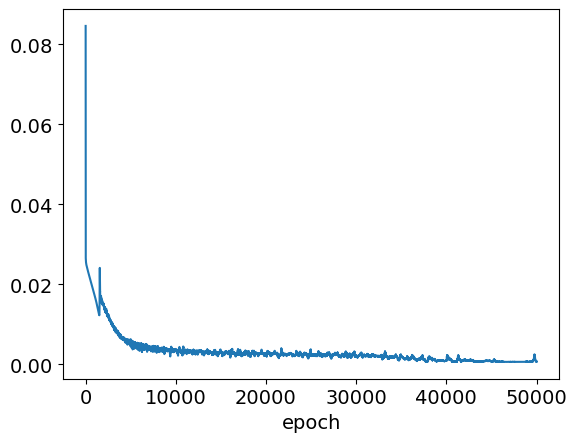

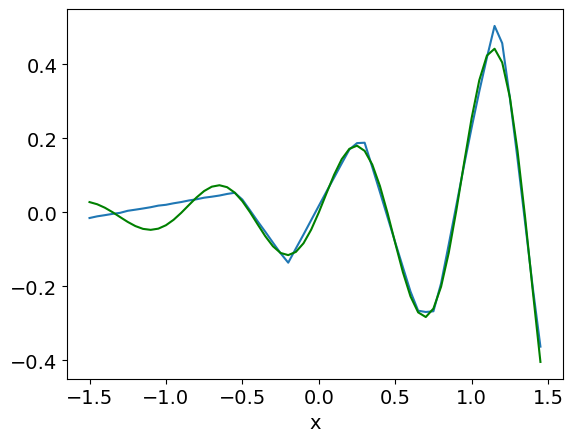

In [54]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# wider model
model = PerceptronDeep(hidden_size=20).to(device)
X, y = X.to(device), y.to(device)

# train
optimizer = optim.SGD(model.parameters(), lr=0.2)
N_epochs = 50000

train_loss = []
model.train()  # turn on the training mode
for _ in range(N_epochs):
    # this will zero out the gradients for this batch
    optimizer.zero_grad()
    # make predictions
    y_pred = model(X)
    # calculate the MSE loss
    loss = MSE(y_pred, y)
    # backpropagate the loss
    loss.backward()
    # update the model weights (with assumed learning rate)
    optimizer.step()
    train_loss.append(loss.item())

plt.plot(train_loss)
plt.xlabel('epoch')
plt.show()

model.eval()
plt.plot(X.cpu(), model(X).cpu().detach())
plt.plot(X.cpu(), y.cpu(), 'g')
plt.xlabel('x')
plt.show()

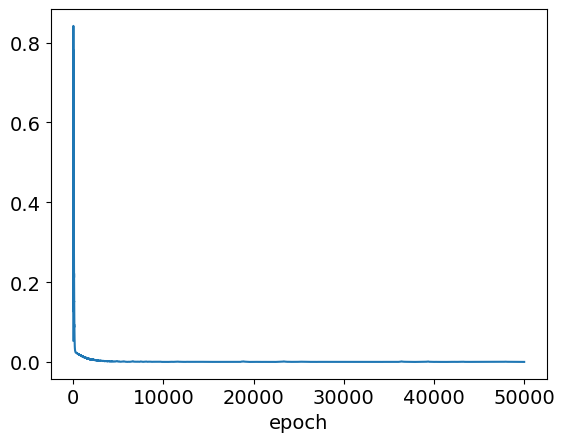

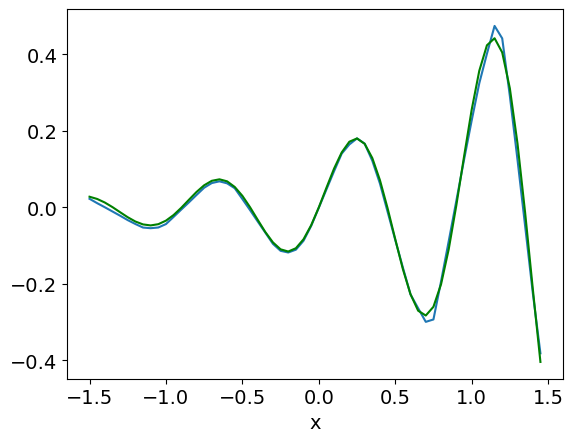

In [55]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# wider model
model = PerceptronDeep(hidden_size=100).to(device)
X, y = X.to(device), y.to(device)

# train
optimizer = optim.SGD(model.parameters(), lr=0.2)
N_epochs = 50000

train_loss = []
model.train()  # turn on the training mode
for _ in range(N_epochs):
    # this will zero out the gradients for this batch
    optimizer.zero_grad()
    # make predictions
    y_pred = model(X)
    # calculate the MSE loss
    loss = MSE(y_pred, y)
    # backpropagate the loss
    loss.backward()
    # update the model weights (with assumed learning rate)
    optimizer.step()
    train_loss.append(loss.item())

plt.plot(train_loss)
plt.xlabel('epoch')
plt.show()

model.eval()
plt.plot(X.cpu(), model(X).cpu().detach())
plt.plot(X.cpu(), y.cpu(), 'g')
plt.xlabel('x')
plt.show()

- quite nice fit, Universal Approximation Theorem holds.

Now, let's try with narrower but deeper model:

In [ ]:
import torch.nn.functional as F

class PerceptronDeeper(torch.nn.Module):
    # constructor
    def __init__(self, num_layers, hidden_size):
        super(PerceptronDeeper, self).__init__()
        self.hidden_layer_1st = nn.Sequential(
            nn.Linear(1, hidden_size),
            nn.ReLU(),
        )
        self.hidden_layers = nn.ModuleList(
            [
                nn.Sequential(
                    nn.Linear(hidden_size, hidden_size),
                    nn.ReLU()
                ) for _ in range(num_layers - 1)
            ]
        )
        self.output_layer = nn.Linear(hidden_size, 1)
        self.activation = nn.Tanh()  # Sigmoid has non-negative values

    # mathod called once the model is executed
    def forward(self, x):
        x = self.hidden_layer_1st(x)
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return self.activation(x)

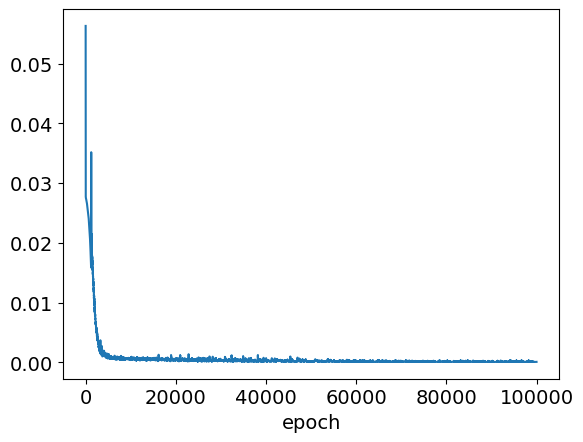

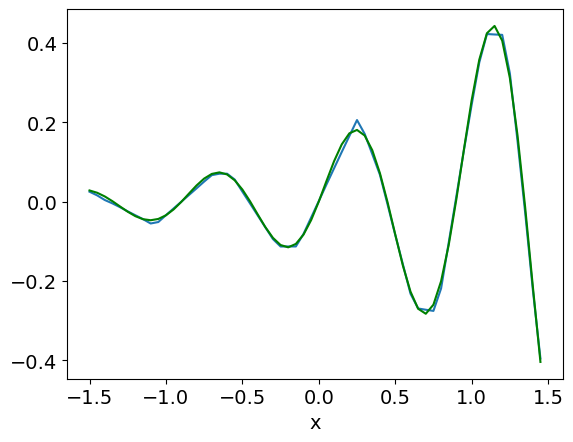

In [58]:
model = PerceptronDeeper(num_layers=2, hidden_size=10).to(device)

optimizer = optim.SGD(model.parameters(), lr=0.2)
MSE = nn.MSELoss()

# train
N_epochs = 100000
train_loss = []
model.train()  # turn on the training mode
for _ in range(N_epochs):
    # this will zero out the gradients for this batch
    optimizer.zero_grad()
    # make predictions
    y_pred = model(X)
    # calculate the MSE loss
    loss = MSE(y_pred, y)
    # backpropagate the loss
    loss.backward()
    # update the model weights (with assumed learning rate)
    optimizer.step()
    train_loss.append(loss.item())

plt.plot(train_loss)
plt.xlabel('epoch')
plt.show()

model.eval()
plt.plot(X.cpu(), model(X).cpu().detach())
plt.plot(X.cpu(), y.cpu(), 'g')
plt.xlabel('x')
plt.show()

How many parameters do both models have?

Let's find out numerically:

In [66]:
shallow_model = PerceptronDeep(hidden_size=10).to(device)
shallow_model20 = PerceptronDeep(hidden_size=20).to(device)
shallow_model100 = PerceptronDeep(hidden_size=100).to(device)
deep_model2_10 = PerceptronDeeper(num_layers=2, hidden_size=10).to(device)

models = (shallow_model, shallow_model20, shallow_model100, deep_model2_10)
model_names = ("shallow", "shallow20", "shallow100", "deep2_10")
for i, model in enumerate(models):
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"The {model_names[i]} model has {num_params} parameters.")

The shallow model has 31 parameters.
The shallow20 model has 61 parameters.
The shallow100 model has 301 parameters.
The deep2_10 model has 141 parameters.


- deeper model with 20 units (2 hidden layers each of 10 units) gives better results than the shalower but wider model (1 hidden layer of 20 units),
- deeper model (typically) takes longer to train.

## Tasks to do
* try to learn neural network adding two binary numbers or performing multiplication by *two* (note that result should also be some binary number),
* what would happened if we changed input function to `sin(70*x)*exp(x)`, how to fix this?